In [1]:
!pip install --user -r ../requirements.txt

    opencv-python (>=3.) ; extra == 'all'
                  ~~~~^


In [2]:
import os
import sys

# Get the root directory of the project (moves one level up from notebooks/)
ROOT_DIR = os.path.abspath("..")

# Add scripts/ folder to Python's module search path
sys.path.append(os.path.join(ROOT_DIR, "scripts"))

# Now import the config module
from config import DATA_PATH  

# Load dataset
import pandas as pd
df = pd.read_csv(DATA_PATH)
print("✅ Dataset loaded successfully!")

✅ Dataset loaded successfully!


In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


The dataset includes 14 columns representing different factors influencing loan approvals and defaults, which are

1) Personal Information:

person_age: Age of the applicant (in years).

person_gender: Gender of the applicant (male, female).

person_education: Educational background (High School, Bachelor, Master, etc.).

person_income: Annual income of the applicant (in USD).

person_emp_exp: Years of employment experience.

person_home_ownership: Type of home ownership (RENT, OWN, MORTGAGE).


2) Loan Details:

loan_amnt: Loan amount requested (in USD).

loan_intent: Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, etc.).

loan_int_rate: Interest rate on the loan (percentage).

loan_percent_income: Ratio of loan amount to income.


3) Credit & Loan History:

cb_person_cred_hist_length: Length of the applicant's credit history (in years).

credit_score: Credit score of the applicant.

previous_loan_defaults_on_file: Whether the applicant has previous loan defaults (Yes or No).


4) Target Variable:

loan_status: 1 if the loan was repaid successfully, 0 if the applicant defaulted.

# 1.0 Exploratory Data Analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### First we check if there are null values or duplicates on the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
df_dupli = df[df.duplicated(keep="last")]
df_dupli.shape

(0, 14)

#### As shown above, there are no NaNs nor duplicates on the dataset.

## 1.1 Target Variable Distribution Analysis

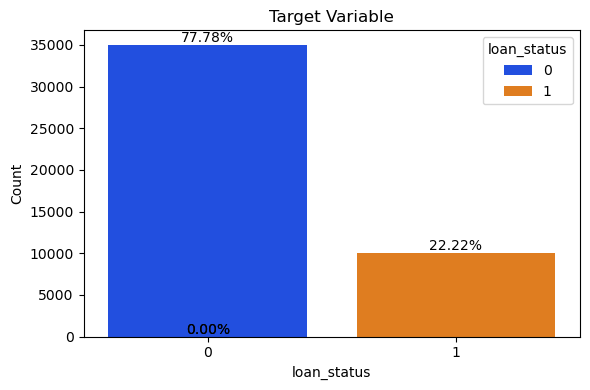

In [7]:
# Create the countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='loan_status', data=df, hue='loan_status', palette='bright')

# Calculate the percentages
total = df['loan_status'].count()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Target Variable')
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### The figure above shows the target variable is moderately imbalanced. To handle this without losing data (no undersampling), we will use parameters of the models to overweight the lower class in comparison with the higher class on our model pipeline.

## 1.2 Categorical Feature Analysis

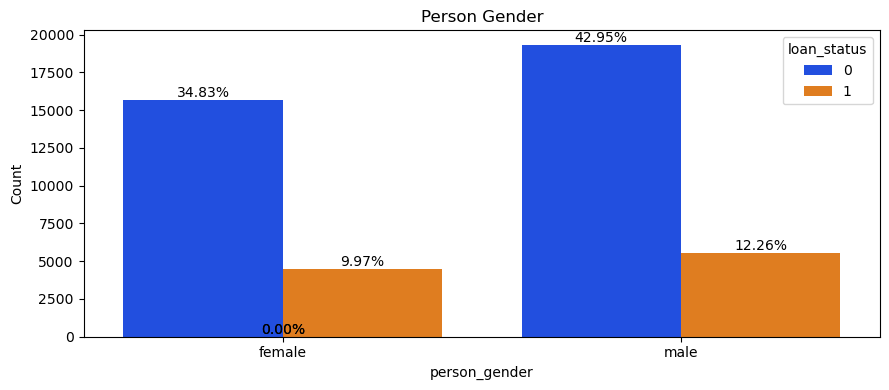

In [8]:
# Create the countplot
plt.figure(figsize=(9, 4))
ax = sns.countplot(x='person_gender', data=df, hue='loan_status', palette='bright')

# Calculate the percentages
total = df['person_gender'].count()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Person Gender')
plt.xlabel('person_gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

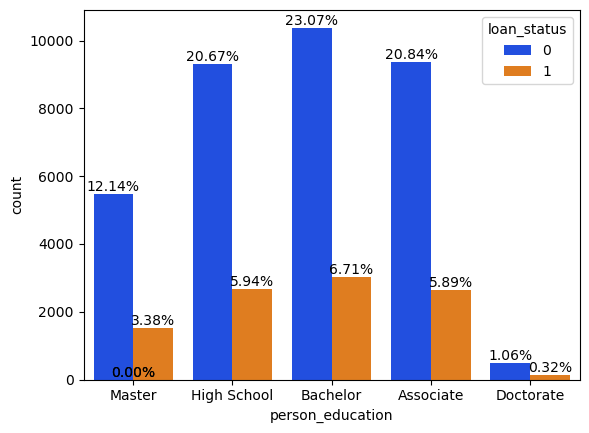

In [9]:
ax = sns.countplot(x='person_education', hue='loan_status', palette='bright', data=df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

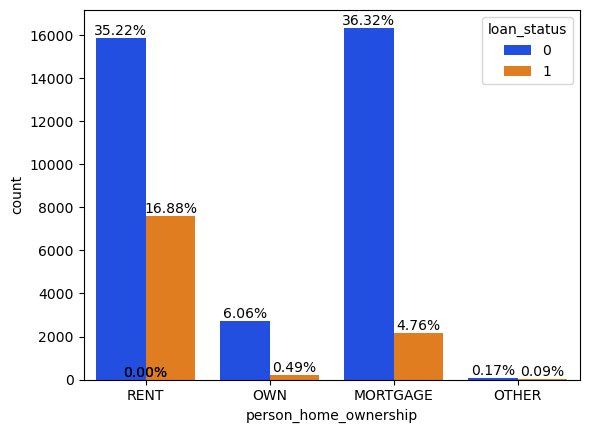

In [10]:
ax = sns.countplot(x='person_home_ownership', hue='loan_status', palette='bright', data=df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

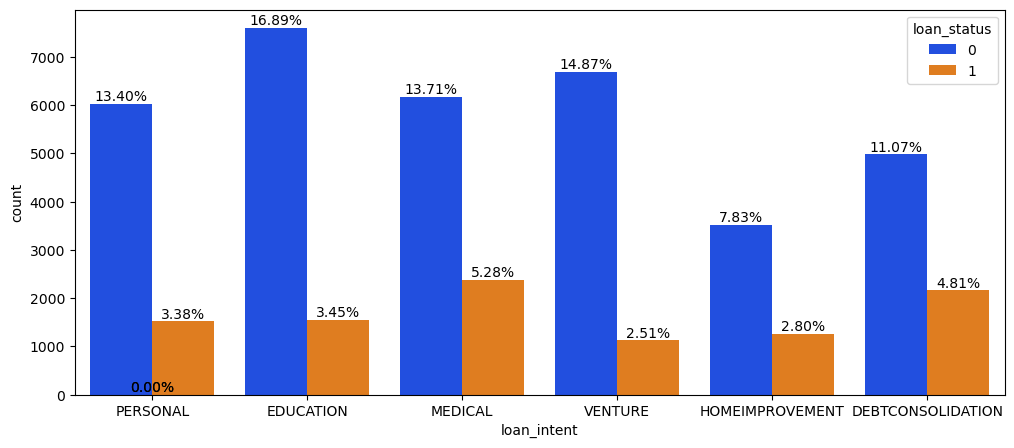

In [11]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='loan_intent', hue='loan_status', palette='bright', data=df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

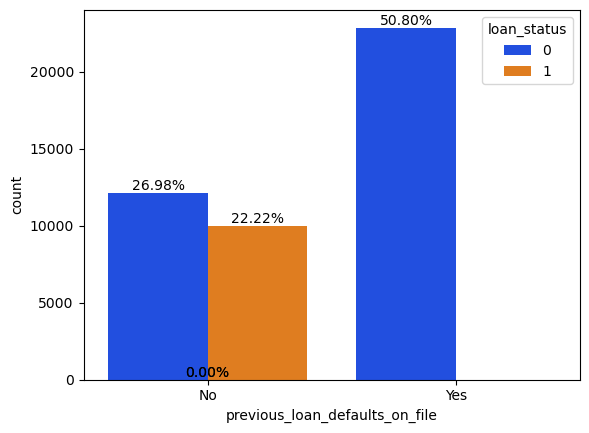

In [12]:
ax = sns.countplot(x='previous_loan_defaults_on_file', hue='loan_status', palette='bright', data=df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

#### The categorical features are well distributed, but to correctly use them in our model pipeline we will apply One-Hot Encoding transformations on them to make their values numerical for the models.

## 1.3 Numerical Feature Distribution Analysis

In [13]:
def boxplot_num_feature_distributions(df):
    """
    Generate distribution plots for numerical features.
    """
    numerical_features = df.select_dtypes(include =['float64', 'int64']).columns
    
    # Set plot style
    #sns.set_style("whitegrid")
    
    # Plot box plots for integer features
    for col in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=df[col], color='red')
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)
        plt.show()


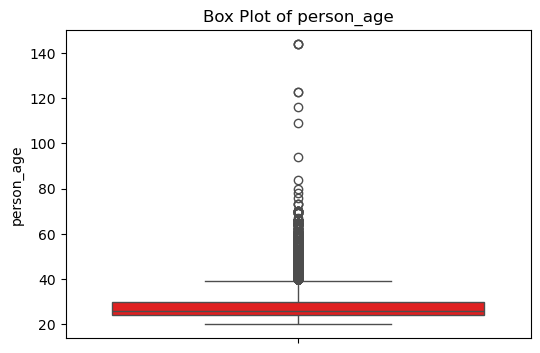

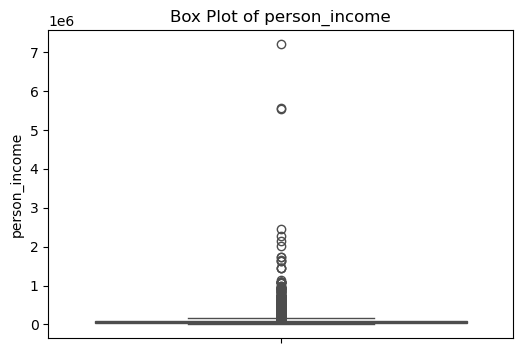

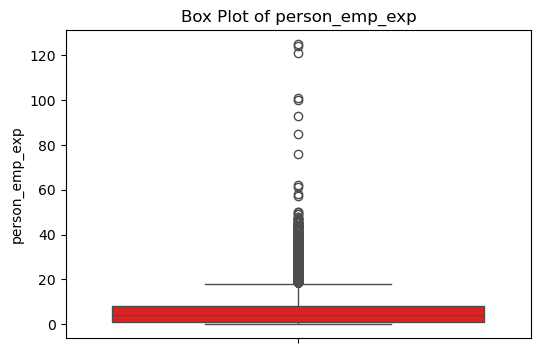

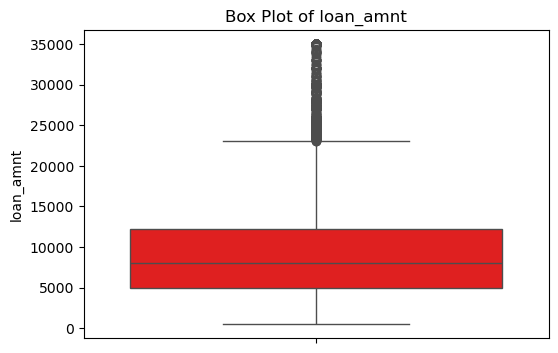

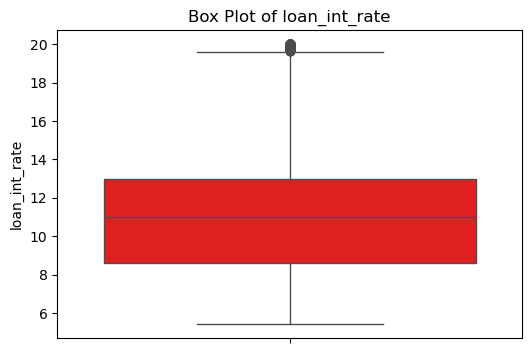

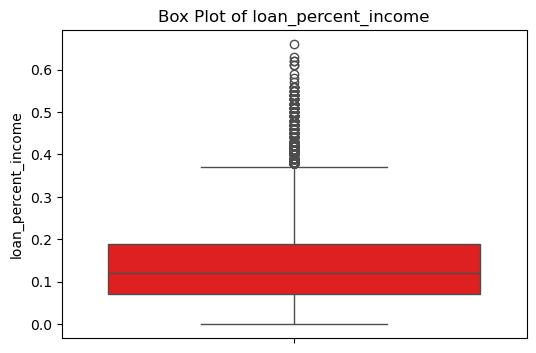

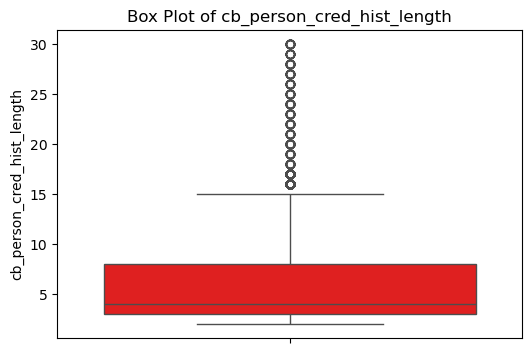

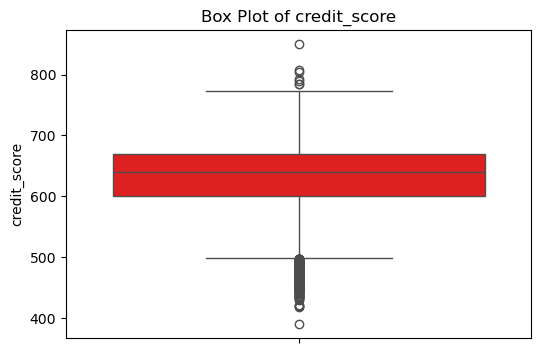

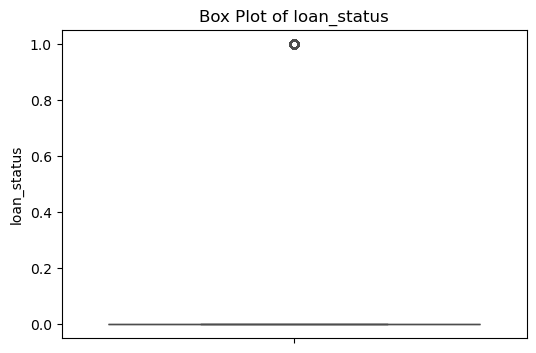

In [14]:
boxplot_num_feature_distributions(df)

#### Let's build a function to extract all box plot statistics to see the IQR and how many outliers each numerical feature has.

In [15]:
from scipy.stats import iqr

def box_plot_stats(df):
    """
    Computes box plot statistics for numerical columns in a DataFrame.
    """
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numerical_features:
        mean_value = df[col].mean()
        std_value = df[col].std()
        min_value = df[col].min()
        max_value = df[col].max()
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].median()
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        lower_whisker = df[col][df[col] >= (Q1 - 1.5 * IQR)].min()
        upper_whisker = df[col][df[col] <= (Q3 + 1.5 * IQR)].max()
        outliers = df[col][(df[col] < lower_whisker) | (df[col] > upper_whisker)].tolist()
        outliers_length = len(outliers)
        
        print(f"Column: {col}")
        print(f"Mean: {mean_value}")
        print(f"Standard Deviation: {std_value}")
        print(f"Minimum: {min_value}")
        print(f"Maximum: {max_value}")
        print(f"Q1 (25th percentile): {Q1}")
        print(f"Median (Q2, 50th percentile): {Q2}")
        print(f"Q3 (75th percentile): {Q3}")
        print(f"IQR: {IQR}")
        print(f"Lower Whisker: {lower_whisker}")
        print(f"Upper Whisker: {upper_whisker}")
        print(f"Outliers Length: {outliers_length}")
        print("-" * 50)

In [16]:
box_plot_stats(df)

Column: person_age
Mean: 27.76417777777778
Standard Deviation: 6.045108211348622
Minimum: 20.0
Maximum: 144.0
Q1 (25th percentile): 24.0
Median (Q2, 50th percentile): 26.0
Q3 (75th percentile): 30.0
IQR: 6.0
Lower Whisker: 20.0
Upper Whisker: 39.0
Outliers Length: 2188
--------------------------------------------------
Column: person_income
Mean: 80319.05322222222
Standard Deviation: 80422.49863189556
Minimum: 8000.0
Maximum: 7200766.0
Q1 (25th percentile): 47204.0
Median (Q2, 50th percentile): 67048.0
Q3 (75th percentile): 95789.25
IQR: 48585.25
Lower Whisker: 8000.0
Upper Whisker: 168653.0
Outliers Length: 2218
--------------------------------------------------
Column: person_emp_exp
Mean: 5.410333333333333
Standard Deviation: 6.063532086575209
Minimum: 0
Maximum: 125
Q1 (25th percentile): 1.0
Median (Q2, 50th percentile): 4.0
Q3 (75th percentile): 8.0
IQR: 7.0
Lower Whisker: 0
Upper Whisker: 18
Outliers Length: 1724
--------------------------------------------------
Column: loan_amn

#### As we can see, features like ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length', and 'credit_score'] have many outliers. A good way to handle this is to apply Winsorization (capping outliers) transformation on these features to limit extreme values of the outliers and reduce their influence.

In [17]:
def plot_num_feature_distributions(df):
    """
    Generate distribution plots for numerical features.
    """
    numerical_features = df.select_dtypes(include =['float64', 'int64']).columns
        
    # Plot distributions for numerical features
    for col in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

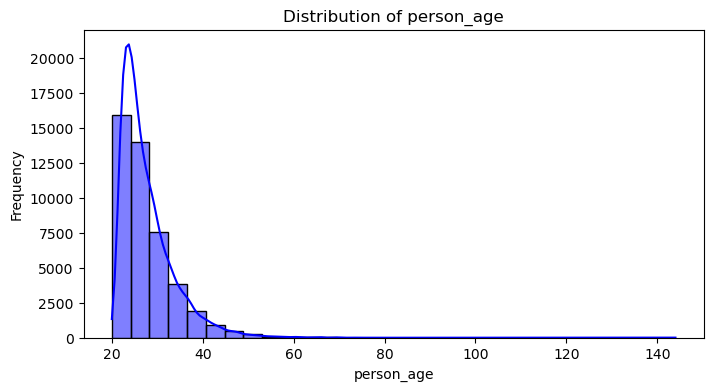

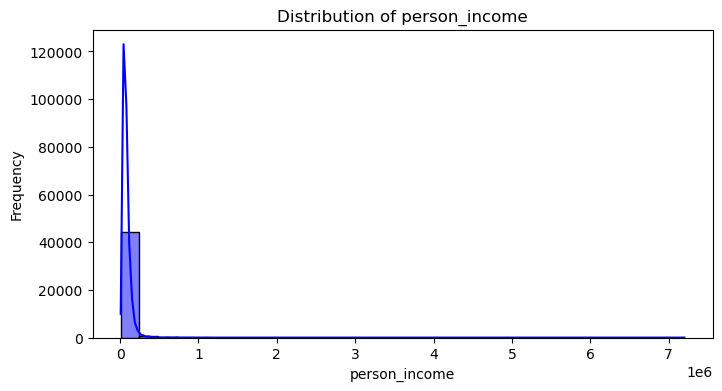

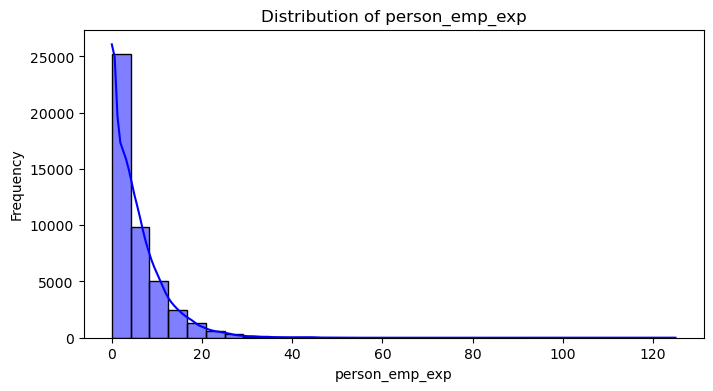

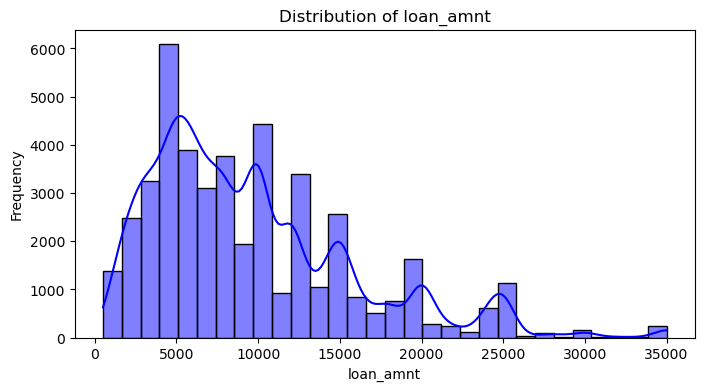

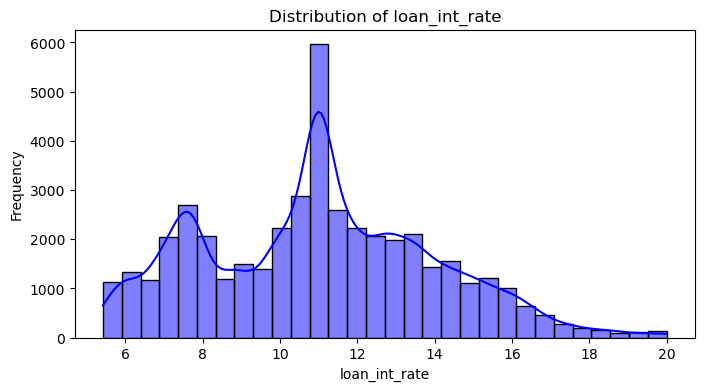

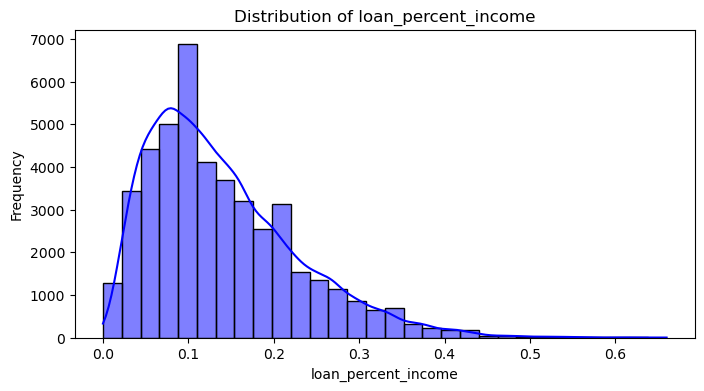

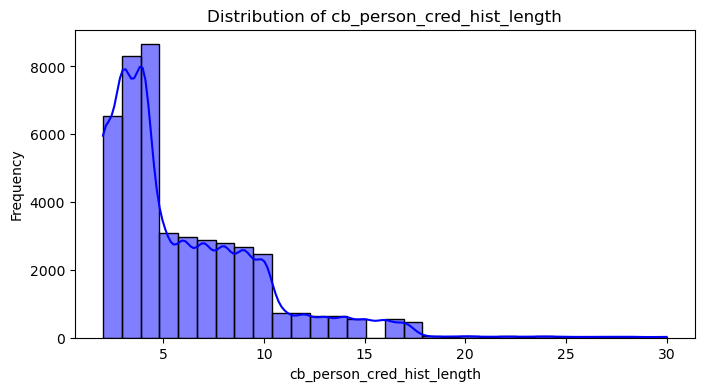

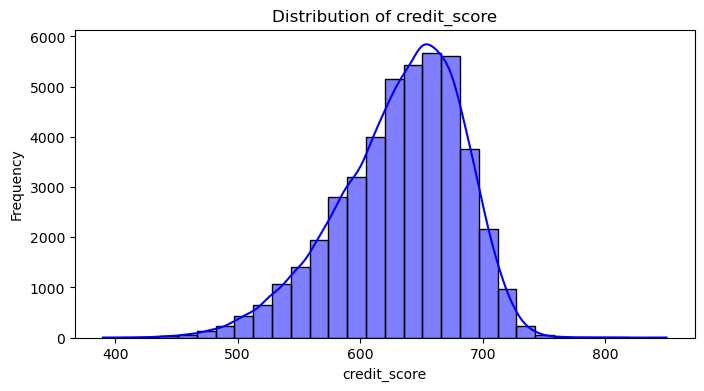

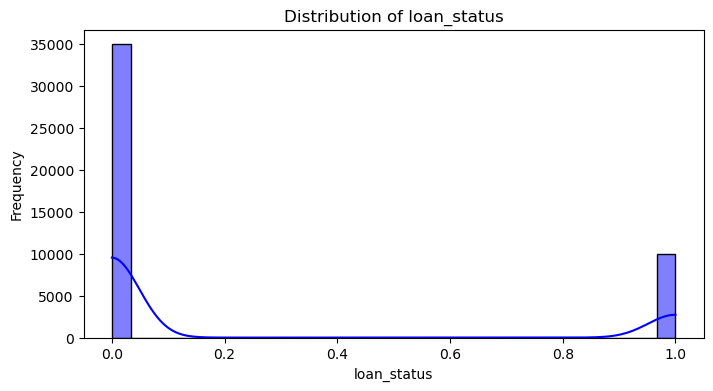

In [18]:
plot_num_feature_distributions(df)

#### The distribution plots above show that features like ['person_income', 'loan_amnt', 'person_emp_exp', 'loan_percent_income'] are highly skewed, which can affect the model training. A good way to handle this is to apply Log(1 + X) transformations on these features to reduce skewness. To see this, let's make distribution plots of their Log(1 + X) transformations.

In [19]:
def logplot_num_feature_distributions(df):
    """
    Generate log1p distribution plots for highly skewed features.
    """
    log_features = ['person_income', 'loan_amnt', 'person_emp_exp', 'loan_percent_income']
        
    # Plot distributions for numerical features
    for col in log_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(np.log(1 + df[col]), kde=True, bins=30, color='blue')
        plt.title(f'Log1p Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

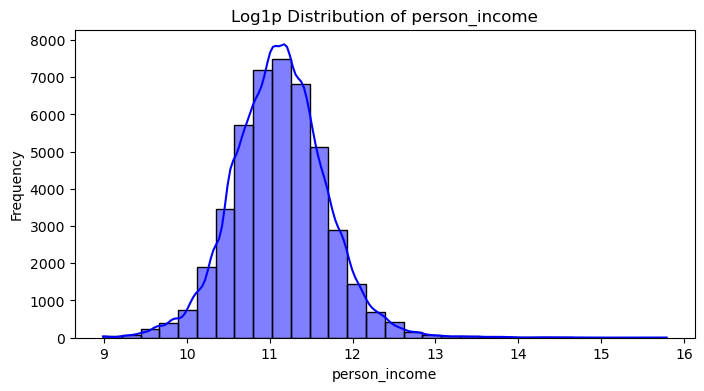

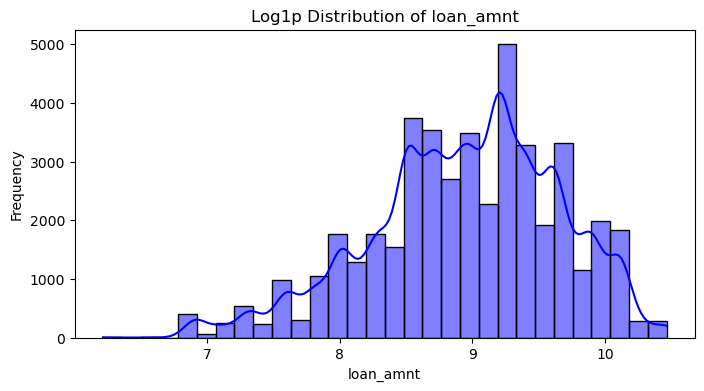

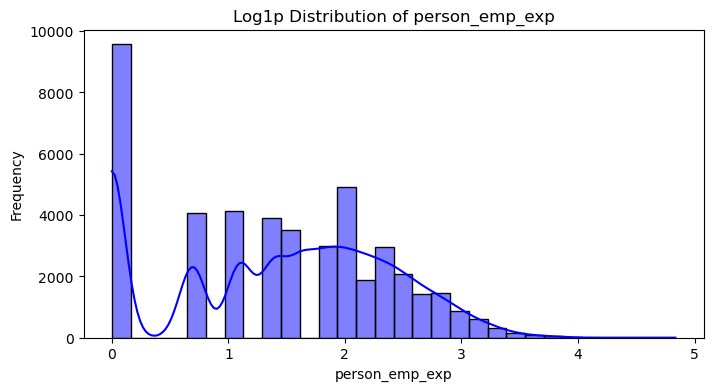

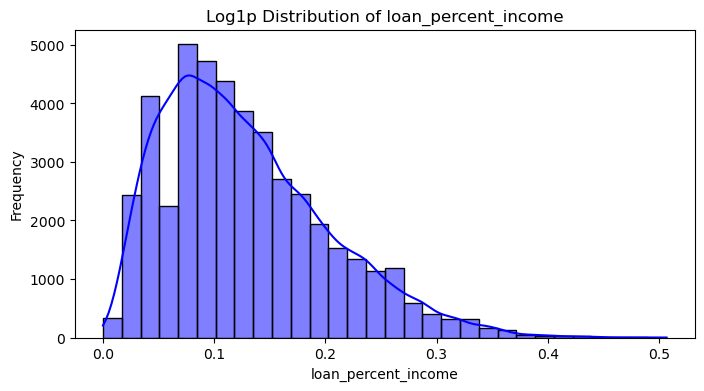

In [20]:
logplot_num_feature_distributions(df)

#### These transformed features have much better distributions for the model training as shown by the plots above.

## 1.4 Feature Correlation Analysis

Text(0.5, 1.05, 'Pearson correlation of Features')

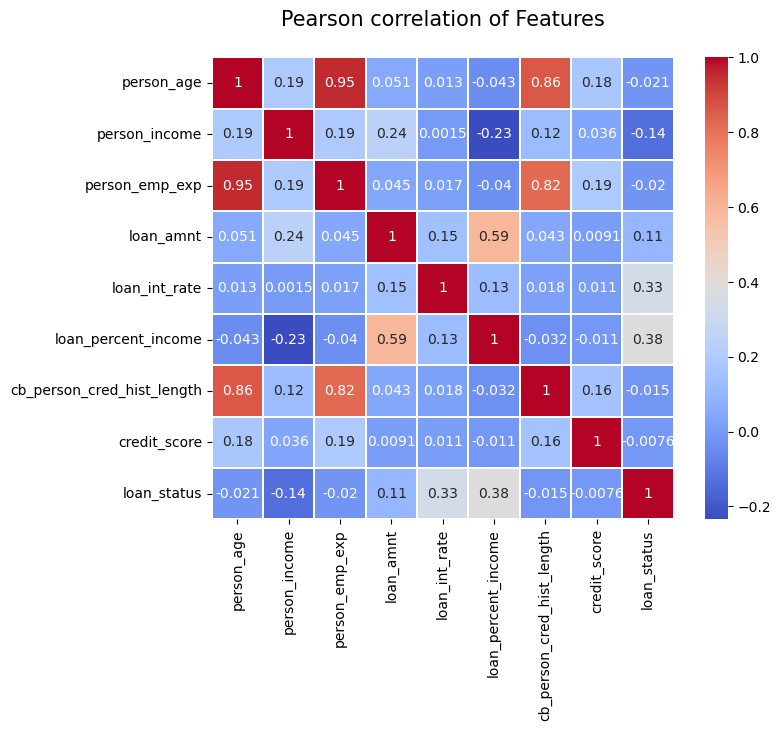

In [21]:
%matplotlib inline
corr = df.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="coolwarm", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Pearson correlation of Features", y=1.05, size=15)

The graph above shows that there is a high correlation between 

'person_age' and 'person_emp_exp', 

'person_age' and 'cb_person_cred_hist_length', 

'cb_person_cred_hist_length' and 'person_emp_exp'.

#### We can drop the most redundant of these highly correlated features, or create a principal component (PCA) feature or use them to create interaction features, but we won't do any of these transformations this time. 

# 2.0 Feature Engineering Pipeline

To build an autonomous model comparison pipeline with the aim to compare many different models, it is better to first build a feature engineering pipeline to prepreocess the data by applying every useful transformation on its specific features. We will apply the transformations obtained from our EDA. Each transformation will be wrapped inside sklearn.compose.ColumnTransformer to ensure they are applied dynamically based on the feature types.

To avoid data leakage and ensure reproducibility, we apply our feature engineering transformations after splitting the data into training, validation test datasets, where we apply our feature engineering pipeline on the training only.

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer

X = df.drop(columns=["loan_status"])
y = df["loan_status"]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [23]:
#import sys
#import os

# Move up one directory from the notebooks folder to reach the project root
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Check if scripts/ is already in sys.path before appending
SCRIPTS_PATH = os.path.join(ROOT_DIR, "scripts")
if SCRIPTS_PATH not in sys.path:
    sys.path.append(SCRIPTS_PATH)

# Verify sys.path contains the correct path
print("Updated sys.path:", sys.path)

# Now import the log_transform function
from custom_transformers import log_transform

Updated sys.path: ['C:\\Users\\felip\\Pasta pessoal\\Job Interviews and Assignments\\NOS\\ml-submission\\notebooks', 'C:\\Users\\felip\\anaconda3\\python38.zip', 'C:\\Users\\felip\\anaconda3\\DLLs', 'C:\\Users\\felip\\anaconda3\\lib', 'C:\\Users\\felip\\anaconda3', '', 'C:\\Users\\felip\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\felip\\anaconda3\\lib\\site-packages', 'c:\\users\\felip\\pasta pessoal\\job interviews and assignments\\nos\\ml-submission', 'C:\\Users\\felip\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\felip\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\felip\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\felip\\anaconda3\\lib\\site-packages\\setuptools\\_vendor', 'C:\\Users\\felip\\Pasta pessoal\\Job Interviews and Assignments\\NOS\\ml-submission\\scripts']


In [24]:
# Define numerical and categorical features
num_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
log_features = ['person_income', 'loan_amnt', 'person_emp_exp', 'loan_percent_income']
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Define pipelines for different numerical transformations
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=num_features)
log_transformer = FunctionTransformer(log_transform, validate=False, feature_names_out='one-to-one')
scaler = StandardScaler()

# Define numerical processing pipeline
num_pipeline = Pipeline([
    ('winsorize', winsorizer),  # Apply Winsorization first
    ('log_transform', log_transformer),  # Apply log transform on specific features
    ('scaler', scaler)  # Scale all numerical features
])

# One-Hot Encoding for categorical features
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Full preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),  # Numerical feature transformations
    ('cat', cat_transformer, cat_features)  # Categorical encoding
])

# 3.0 Model Comparison Pipeline

For model robustness, we will compare the following models using sklearn.pipeline.Pipeline with RandomizedSearchCV for hyperparameter tuning 

Logistic Regression, 
Random Forest,
XGBoost,
Stacking Classifier,

where stacking classifier will use the best tuned of the previous models as estimators.

C:\Users\felip\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\felip\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Logistic Regression...

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      7000
           1       0.56      0.90      0.69      2000

    accuracy                           0.82      9000
   macro avg       0.76      0.85      0.78      9000
weighted avg       0.87      0.82      0.83      9000

Validation AUC: 0.9325173571428572
--------------------------------------------------
Training Random Forest...

Model: Random Forest
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7000
           1       0.75      0.78      0.76      2000

    accuracy                           0.89      9000
   macro avg       0.84      0.85      0.85      9000
weighted avg       0.89      0.89      0.89      9000

Validation AUC: 0.9548851428571429


C:\Users\felip\AppData\Local\Temp\ipykernel_83236\1322339446.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Importance', data=importance_df, palette='bright')


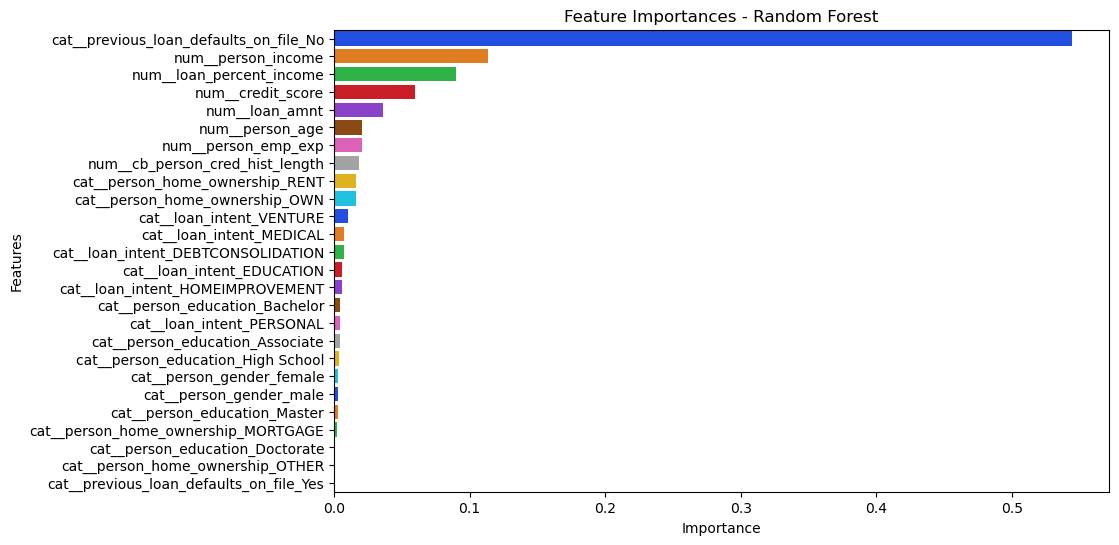

--------------------------------------------------
Training XGBoost...


C:\Users\felip\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7000
           1       0.84      0.71      0.77      2000

    accuracy                           0.91      9000
   macro avg       0.88      0.83      0.85      9000
weighted avg       0.90      0.91      0.90      9000

Validation AUC: 0.9606705714285714


C:\Users\felip\AppData\Local\Temp\ipykernel_83236\1322339446.py:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Importance', data=importance_df, palette='bright')


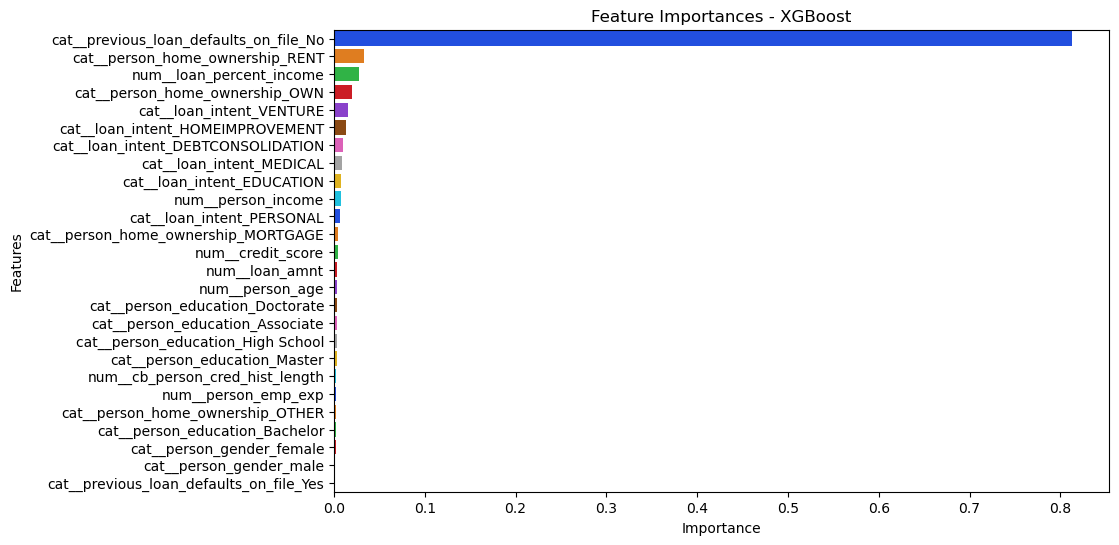

--------------------------------------------------
Training Stacking Classifier...


C:\Users\felip\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\felip\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:43:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\felip\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:43:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\felip\anaconda3\lib\site-packages\


Model: Stacking Classifier
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7000
           1       0.67      0.87      0.76      2000

    accuracy                           0.88      9000
   macro avg       0.82      0.88      0.84      9000
weighted avg       0.90      0.88      0.88      9000

Validation AUC: 0.9572305714285714
--------------------------------------------------
Best Model Selected: XGBoost
Final Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7000
           1       0.84      0.71      0.77      2000

    accuracy                           0.90      9000
   macro avg       0.88      0.84      0.85      9000
weighted avg       0.90      0.90      0.90      9000

Test AUC: 0.9614442857142856


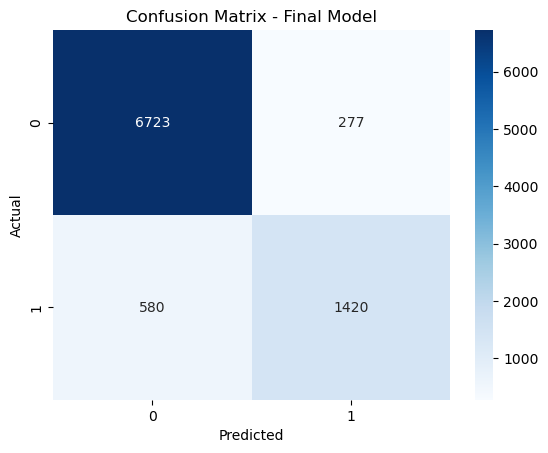

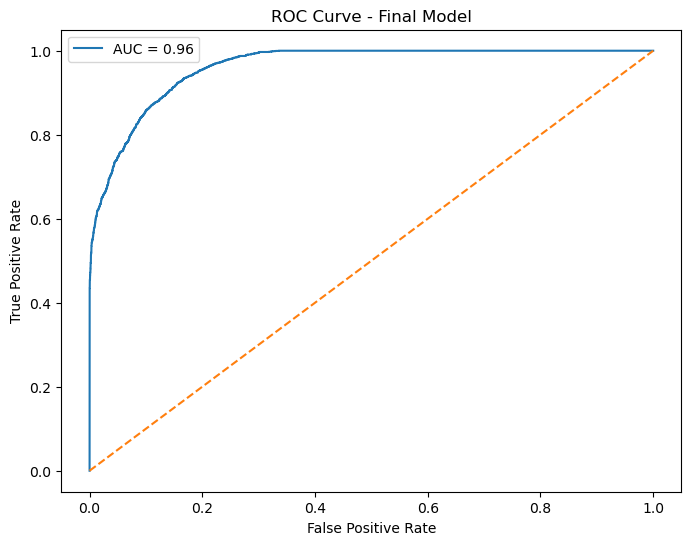

In [25]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, confusion_matrix
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define hyperparameter search space
rf_param_grid = {
    'classifier__n_estimators': [100, 300, 600, 1000],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

xgb_param_grid = {
    'classifier__n_estimators': [50, 100, 200, 500],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__scale_pos_weight': [1, float(y_train.value_counts()[0]) / y_train.value_counts()[1]],   
    'classifier__min_child_weight': [1, 3, 5]
}

logistic_param_grid = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__penalty': ['l1', 'l2']
}

# Define Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models with hyperparameter tuning
logistic_regression = RandomizedSearchCV(
    Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(class_weight="balanced", solver='liblinear', random_state=42))
    ]),
    param_distributions=logistic_param_grid,
    n_iter=50,
    cv=cv,
    scoring=make_scorer(roc_auc_score, needs_proba=True),
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_forest = RandomizedSearchCV(
    Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
    ]),
    param_distributions=rf_param_grid,
    n_iter=50,  
    cv=cv,
    scoring=make_scorer(roc_auc_score, needs_proba=True),
    n_jobs=-1,
    verbose=1,
    random_state=42
)

xgboost = RandomizedSearchCV(
    Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ]),
    param_distributions=xgb_param_grid,
    n_iter=50,
    cv=cv,
    scoring=make_scorer(roc_auc_score, needs_proba=True),
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit models to find the best hyperparameters. Notice: In the Model Pipeline, each model pipeline already includes the preprocessor 
# as the first step, meaning the transformations (feature engineering, scaling, encoding) are automatically applied during fit() and predict().
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Retrieve best models
best_logistic = logistic_regression.best_estimator_
best_rf = random_forest.best_estimator_
best_xgb = xgboost.best_estimator_

# Stacking Classifier with tuned models
stacking_classifier = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", StackingClassifier(
        estimators=[
            ("lr", best_logistic.named_steps["classifier"]),
            ("rf", best_rf.named_steps["classifier"]),
            ("xgb", best_xgb.named_steps["classifier"])
        ],
        final_estimator=LogisticRegression(class_weight="balanced", random_state=42)
    ))
])

# Store only best models on dictionary to avoid redundant training
models = {
    "Logistic Regression": best_logistic,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Stacking Classifier": stacking_classifier
}

# Train, Validate, and Compare Best Models of Each Algorith to Avoid Redundant Training
model_performance = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None
    
    print(f"\nModel: {name}")
    print(classification_report(y_val, y_pred))
    if y_pred_proba is not None:
        auc = roc_auc_score(y_val, y_pred_proba)
        model_performance[name] = auc
        print(f"Validation AUC: {auc}")
    
    # Feature importance plots
    # If model is RandomizedSearchCV,use model.best_estimator_.named_steps["classifier"].If model is just a Pipeline,access model.named_steps["classifier"]
    classifier = (
    model.best_estimator_.named_steps["classifier"] 
    if hasattr(model, "best_estimator_") 
    else model.named_steps["classifier"]
    ) 

    if hasattr(classifier, "feature_importances_"):
        importances = classifier.feature_importances_
    
        # Get feature names AFTER preprocessing
        feature_names = model.named_steps["preprocessor"].get_feature_names_out()

        # Ensure matching lengths
        if len(importances) == len(feature_names):
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
            plt.figure(figsize=(10, 6))
            sns.barplot(y='Feature', x='Importance', data=importance_df, palette='bright')
            plt.title(f"Feature Importances - {name}")
            plt.xlabel("Importance")
            plt.ylabel("Features")
            plt.show()
        else:
            print(f"Warning: Feature importance length ({len(importances)}) does not match feature names length ({len(feature_names)}) for {name}. Skipping plot.")
    
    print("-" * 50)

# Best Model Selection based on Validation AUC
best_model_name = max(model_performance, key=model_performance.get)
best_model = models[best_model_name]

print(f"Best Model Selected: {best_model_name}")

# Final Test Evaluation
y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

test_auc = roc_auc_score(y_test, y_test_pred_proba)
print("Final Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))
print(f"Test AUC: {test_auc}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {test_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final Model")
plt.legend()
plt.show()

The best selected model was XGBoost with Validation AUC = 0.9607 and Test AUC = 0.961. The hyperparameter tuning included on the model pipeline surely contributed a lot for the model to obtain such good test AUC, which is a little above validation AUC. Data quality and the feature engineering we included in our model pipeline were also highly relevant for this result.

# 4.0 Model Package
To make this model ready for production we need to save the entire pipeline to prevent inconsistencies during inference. For this, we use .joblib format because it is optimized for storing large arrays efficiently using memory mapping, making it faster and more efficient than pickle. It also supports compressed saving using compress argument reducing disk space usage, and works better with large models trained with parallel processing like RandomForestClassifier and XGBoost.

In [26]:
import joblib
#import os

# Define the model save path with .joblib extension
MODEL_PATH = os.path.join("..", "model", "final_model.joblib")
# Ensure the model directory exists
os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True)

# Save the best model with compression
if not os.path.exists(MODEL_PATH):
    joblib.dump(best_model, MODEL_PATH, compress=3)  # Compression level 3 (balance between speed & size)
    print(f"✅ Model saved successfully at {MODEL_PATH} (compressed)")
else:
    print(f"⚠️ Model file already exists at {MODEL_PATH}. Skipping save to avoid overwriting.")


✅ Model saved successfully at ..\model\final_model.joblib (compressed)


#### Notice: since we built our model as a scikit-learn Pipeline, then best_model is not just the classifier, but also includes all feature engineering and transformations in it. To make sure we saved the entire pipeline, when we do joblib.dump(best_model, MODEL_PATH), it saves everything inside the pipeline, including: data preprocessing (feature transformations, scaling, encoding, etc.), feature selection (if applied) and the final classifier.